In [8]:
import spotipy
import pandas as pd
from spotipy.oauth2 import SpotifyClientCredentials
import json


with open("credentials.json") as infile:
        auth = json.load(infile)
        client_id = auth["client_id"]
        client_secret = auth["client_secret"]

spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(client_id=client_id, client_secret=client_secret))

artist_name = []
track_name = []
track_popularity = []
artist_id = []
track_id = []
energy = []
instrumentalness = []
key = []
tempo = []
time_sig = []
valence = [] # How happy a song is??? SO COOL
dancebility = []
acousticness = []
artists_and_tracks = []

In [9]:
import time
count = 0
stupid_tracks = 0
iterations = 0
for i in range(0,1000,50):
    track_results = spotify.search(q='year:1960-2023', type='track', limit=50,offset=i)
    for i, t in enumerate(track_results['tracks']['items']):
        f = spotify.audio_features(t['id'])
        f = f[0] # this does not work with live recordings
        artists_id = t['artists'][0]['id']
        track_names = t['name']
        artist_and_track = artists_id + track_names # made an attribute that adds the id and track name together
        if f and (t['popularity'] > 0) and (artist_and_track not in artists_and_tracks) and (t["album"]["artists"][0]["name"] != "Various Artists"): # checks if popularity is greater than 0 and if the song is already in the dataset
            artist_name.append(t['artists'][0]['name'])
            artist_id.append(t['artists'][0]['id'])
            track_name.append(t['name'])
            track_id.append(t['id'])
            track_popularity.append(t['popularity'])
            energy.append(f['energy'])
            instrumentalness.append(f["instrumentalness"])
            key.append(f["key"])
            tempo.append(f["tempo"])
            time_sig.append(f["time_signature"])
            valence.append(f["valence"])
            dancebility.append(f["danceability"])
            acousticness.append(f["acousticness"])
            artists_and_tracks.append(artist_and_track)
        else:
            stupid_tracks+= 1
    iterations += 1
            
        
        

track_df = pd.DataFrame({'artist_name' : artist_name, 'track_name' : track_name, 'track_id' : track_id, 
                         'track_popularity' : track_popularity, 'artist_id' : artist_id,
                         'energy': energy, 'instrumentalness': instrumentalness,
                         'key': key, 'tempo': tempo, 'time_sig': time_sig, 'valence': valence,
                         'danceability': dancebility, 'acousticness': acousticness})

,artist_name,track_name,track_id,track_popularity,artist_id,energy,instrumentalness,key,tempo,time_sig,valence,danceability,acousticness
50,Tory Lanez,The Color Violet,3azJifCSqg9fRij2yKIbWz,88,2jku7tDXc6XoB6MO2hFuqg,0.534,0.000000,6,105.020,4,0.463,0.645,0.15700
51,Stephen Sanchez,Until I Found You (with Em Beihold) - Em Beiho...,1Y3LN4zO1Edc2EluIoSPJN,93,5XKFrudbV4IiuE5WuTPRmT,0.550,0.000000,10,101.190,3,0.342,0.551,0.77700
52,David Guetta,I'm Good (Blue),4uUG5RXrOk84mYEfFvj3cK,95,1Cs0zKBU1kc0i8ypK3B9ai,0.965,0.000007,7,128.040,4,0.304,0.561,0.00383
53,Bad Bunny,Me Porto Bonito,6Sq7ltF9Qa7SNFBsV5Cogx,92,4q3ewBCX7sLwd24euuV69X,0.712,0.000027,1,92.005,4,0.425,0.911,0.09010
54,Morgan Wallen,Man Made A Bar (feat. Eric Church),73zawW1ttszLRgT9By826D,82,4oUHIQIBe0LHzYfvXNW4QM,0.764,0.000031,4,147.984,4,0.489,0.498,0.12300
55,Arctic Monkeys,505,58ge6dfP91o9oXMzq3XkIS,82,7Ln80lUS6He07XvHI8qqHH,0.852,0.000058,0,140.267,4,0.234,0.520,0.00237
56,Future,WAIT FOR U (feat. Drake & Tems),59nOXPmaKlBfGMDeOVGrIK,86,1RyvyyTE3xzB2ZywiAwp0i,0.642,0.000000,1,83.389,4,0.339,0.463,0.31400
57,"Tyler, The Creator",See You Again (feat. Kali Uchis),7KA4W4McWYRpgf0fWsJZWB,86,4V8LLVI7PbaPR0K2TGSxFF,0.559,0.000007,6,78.558,4,0.620,0.558,0.37100
58,RAYE,Escapism.,5Z2MiIZ5I3jJvvmeWMLbOQ,91,5KKpBU5eC2tJDzf0wmlRp2,0.742,0.000047,2,96.107,4,0.250,0.538,0.13800
59,Harry Styles,As It Was,4LRPiXqCikLlN15c3yImP7,92,6KImCVD70vtIoJWnq6nGn3,0.731,0.001010,6,173.930,4,0.662,0.520,0.34200


In [10]:
print(track_df["valence"].count())
print(stupid_tracks)

67
933


In [42]:
print(track_df["track_popularity"].mean())

47.58715596330275


(array([ 30.,  40.,  27.,  17., 138., 212., 139.,  77.,  54.,  29.]),
 array([ 1. ,  9.5, 18. , 26.5, 35. , 43.5, 52. , 60.5, 69. , 77.5, 86. ]),
 <BarContainer object of 10 artists>)

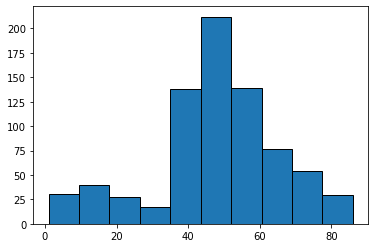

In [43]:
import matplotlib.pyplot as plt

plt.hist(track_df["track_popularity"], bins=10, edgecolor = "black")

In [20]:
track_df.head()

,artist_name,track_name,track_id,track_popularity,artist_id,energy,instrumentalness,key,tempo,time_sig,valence,danceability,acousticness
0,Bebepop,Mountain Rabbit,4DTSKJLKcRa3Og9zTwNcyI,1,6R4e62u2QrygCA7tdedSAq,0.423,0,0,163.866,4,0.837,0.623,0.731


In [4]:
track_df.to_csv("af1.csv")